In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
device = torch.device('cuda:0')

In [3]:
from utils.test_utils import obtain_AL_ckpts, split_AL_loaders
from utils.test_utils import load_AL_config, load_AL_dataloader, load_test_model

In [23]:
save_dir = '../results/simulation/220226_0425'
config_file, state_list, data_files = obtain_AL_ckpts(save_dir)

unknown file:  train_AL.txt


In [24]:
print(state_list, data_files)

['binaryNN_0.pt', 'binaryNN_1.pt', 'binaryNN_2.pt', 'binaryNN_3.pt', 'binaryNN_4.pt', 'binaryNN_5.pt', 'binaryNN_6.pt', 'binaryNN_7.pt', 'binaryNN_8.pt', 'binaryNN_9.pt'] ['test_loader.pkl', 'final_dataloader.pkl']


### load models and train data loaders

In [29]:
args = load_AL_config(save_dir, config_file)
dl_loader = load_AL_dataloader(args.save_dir,'final_dataloader.pkl')
test_loader = load_AL_dataloader(args.save_dir,'test_loader.pkl')

In [30]:
dl_loaders,dl_cum_loaders = split_AL_loaders(dl_loader, args)

In [31]:
from utils.test_utils import test_groupwise, test_model

In [32]:
for it,st in enumerate(state_list):
    print("="*50)
    clf,clf_criterion = load_test_model(save_dir, st, args)
    _, acc = test_model(clf, dl_cum_loaders[it],clf_criterion, device, args.problem_type)
    _, acc2 = test_model(clf, test_loader,clf_criterion, device, args.problem_type)
    print("cumulated total training/test acc:", acc,"/",acc2)
    test_groupwise(clf, dl_cum_loaders[it],clf_criterion, device, 
               AL_select = args.AL_select, problem_type = args.problem_type, return_loader=False)
    print("test set performance")
    test_groupwise(clf, test_loader,clf_criterion, device, 
               AL_select = args.AL_select, problem_type = args.problem_type, return_loader=False)
    print('-'*50)
    for i in range(it+1):
        _, acc = test_model(clf, dl_loaders[i],clf_criterion, device, args.problem_type)
        print("data loader",i, "acc:",acc)
        test_groupwise(clf, dl_loaders[i],clf_criterion, device, 
               AL_select = args.AL_select, problem_type = args.problem_type, return_loader=False)
        print("")

loaded model is binaryNN_0.pt
cumulated total training/test acc: tensor(88.) / tensor(62.4703)
0.0 : loss 0.24249610304832458 / acc 85.71428680419922
1.0 : loss 0.18469487130641937 / acc 93.33332824707031
test set performance
0.0 : loss 0.8955872058868408 / acc 61.23778533935547
1.0 : loss 0.7399066686630249 / acc 65.78947448730469
--------------------------------------------------
data loader 0 acc: tensor(88.)
0.0 : loss 0.24249610304832458 / acc 85.71428680419922
1.0 : loss 0.18469487130641937 / acc 93.33332824707031

loaded model is binaryNN_1.pt
cumulated total training/test acc: tensor(56.8182) / tensor(54.1568)
0.0 : loss 0.662737250328064 / acc 50.0
1.0 : loss 0.5939285159111023 / acc 73.68421173095703
test set performance
0.0 : loss 0.6969497203826904 / acc 48.20846939086914
1.0 : loss 0.6304630637168884 / acc 70.1754379272461
--------------------------------------------------
data loader 0 acc: tensor(60.)
0.0 : loss 0.6497994065284729 / acc 54.28571319580078
1.0 : loss 0.603

1.0 : loss 0.541613757610321 / acc 80.0

data loader 1 acc: tensor(96.8750)
0.0 : loss 0.2752991318702698 / acc 95.83333587646484
1.0 : loss 0.11160866916179657 / acc 100.0

data loader 2 acc: tensor(90.6250)
0.0 : loss 0.111813485622406 / acc 95.45454406738281
1.0 : loss 0.6920133829116821 / acc 80.0

data loader 3 acc: tensor(93.7500)
0.0 : loss 0.3235355019569397 / acc 95.83333587646484
1.0 : loss 0.48248493671417236 / acc 87.5

data loader 4 acc: tensor(96.8750)
0.0 : loss 0.14019730687141418 / acc 95.45454406738281
1.0 : loss 0.11131954193115234 / acc 100.0

data loader 5 acc: tensor(90.6250)
0.0 : loss 0.263908714056015 / acc 84.21052551269531
1.0 : loss 0.09389857202768326 / acc 100.0

data loader 6 acc: tensor(93.7500)
0.0 : loss 0.14996325969696045 / acc 90.0
1.0 : loss 0.08736841380596161 / acc 100.0

data loader 7 acc: tensor(100.)
0.0 : loss 0.20309953391551971 / acc 100.0
1.0 : loss 0.16342793405056 / acc 100.0

data loader 8 acc: tensor(93.7500)
0.0 : loss 0.1787243485450

In [14]:
from utils.data_utils import dataset_description, dl2nparray

data loader 0


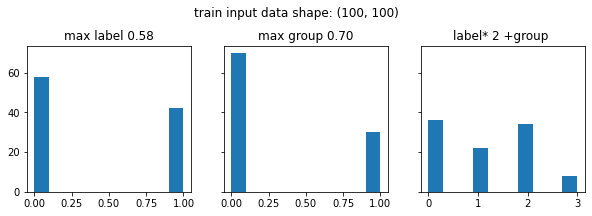

data loader 1


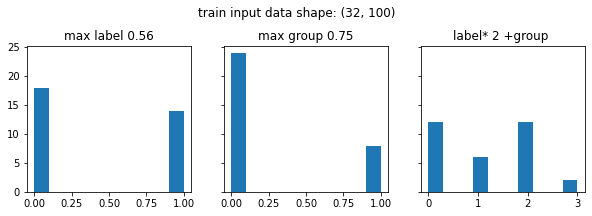

data loader 2


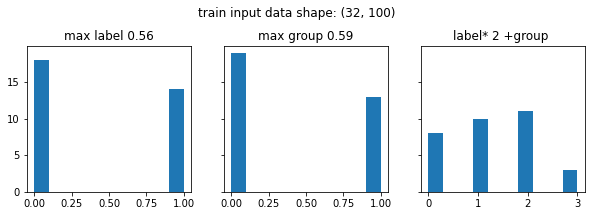

data loader 3


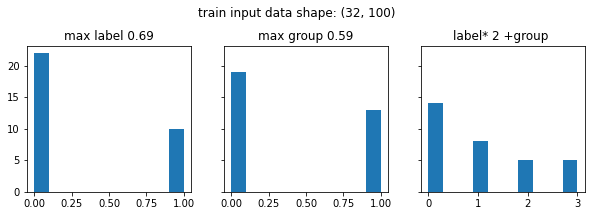

data loader 4


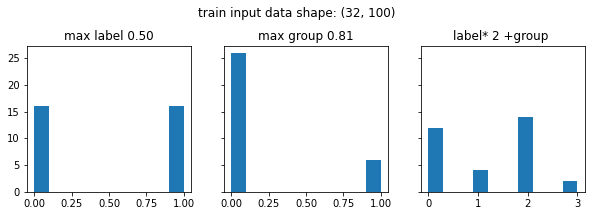

data loader 5


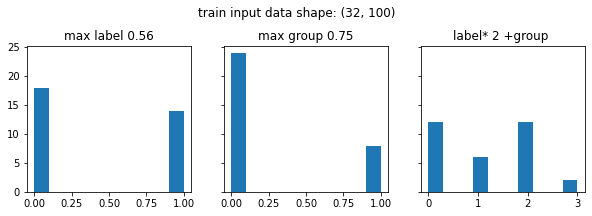

data loader 6


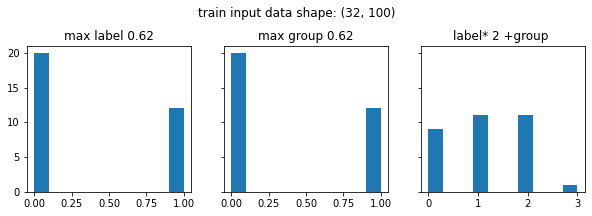

data loader 7


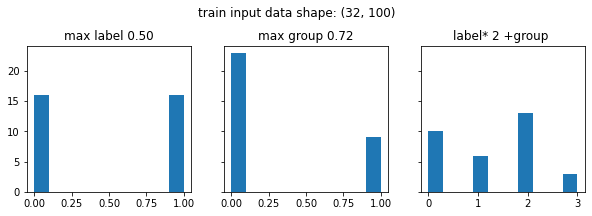

data loader 8


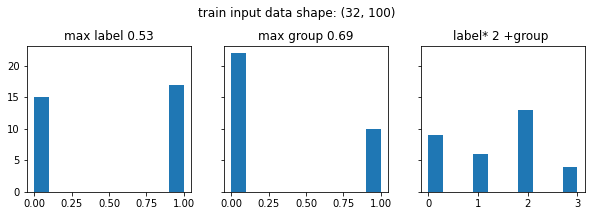

data loader 9


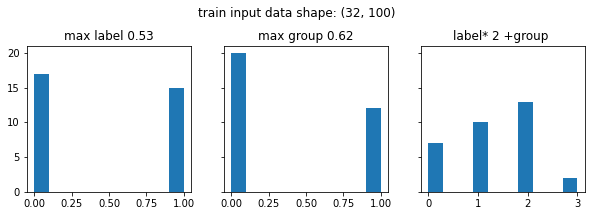

data loader 10


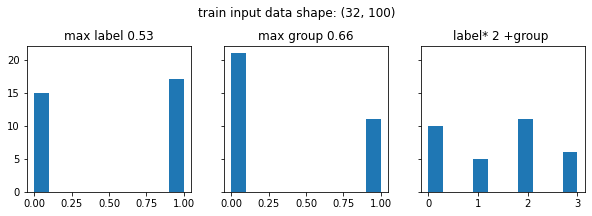

In [15]:
for i in range(len(dl_loaders)):
    print("data loader",i)
    x,y,z = dl2nparray(dl_loaders[i])
    dataset_description(x,y,z)

data cumulative loader 0


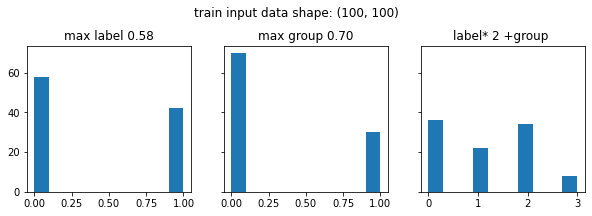

data cumulative loader 1


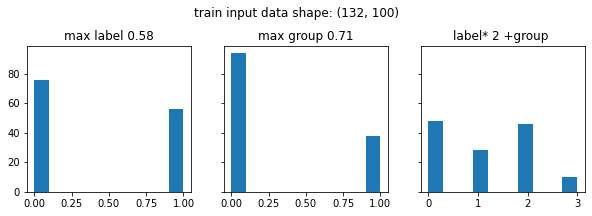

data cumulative loader 2


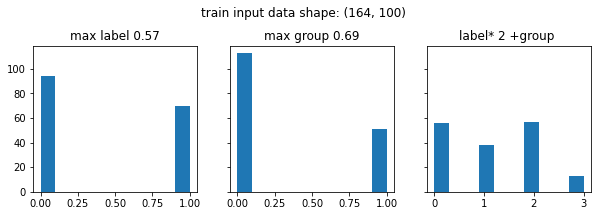

data cumulative loader 3


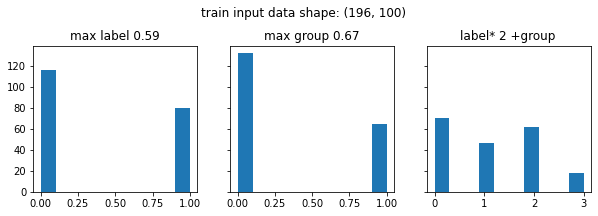

data cumulative loader 4


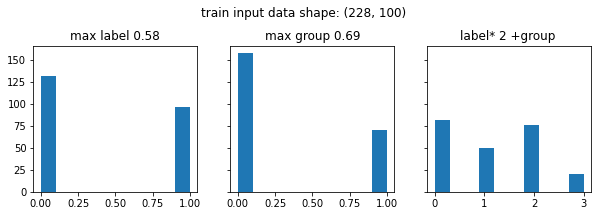

data cumulative loader 5


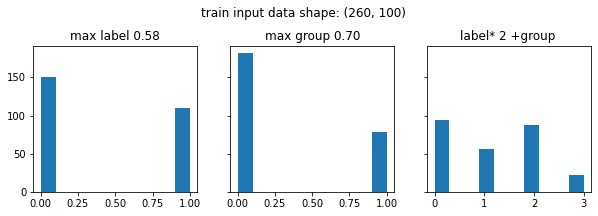

data cumulative loader 6


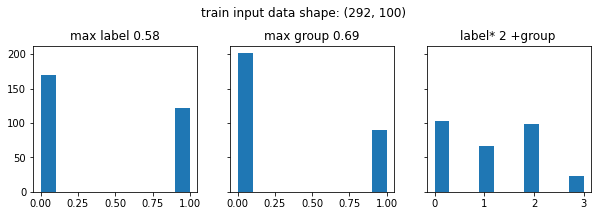

data cumulative loader 7


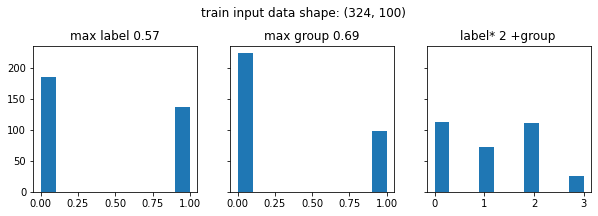

data cumulative loader 8


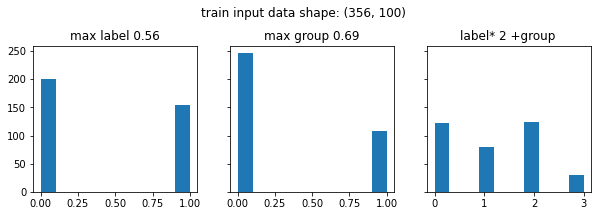

data cumulative loader 9


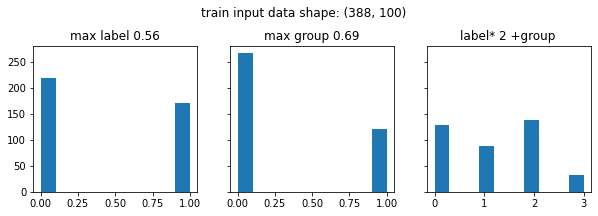

data cumulative loader 10


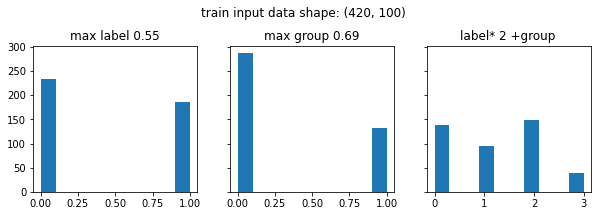

In [16]:
for i in range(len(dl_loaders)):
    print("data cumulative loader",i)
    x,y,z = dl2nparray(dl_cum_loaders[i])
    dataset_description(x,y,z)

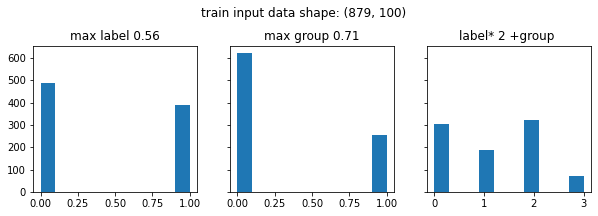

In [17]:
x,y,z = dl2nparray(test_loader)
dataset_description(x,y,z)